# Experiment Notebook: Code Walkthrough

# Table of Contents
* [Experiment Summary](#Experiment-Summary)
* [Experiment Assumptions](#Experiment-Assumptions)
* [Experiment Setup](#Experiment-Setup)
* [Analysis 1: ...](#Analysis-1:-...)

# Experiment Summary 

The purpose of this notebook is to...

# Experiment Assumptions

See [assumptions document](../../ASSUMPTIONS.md) for further details.

# Experiment Setup

We begin with several experiment-notebook-level preparatory setup operations:

* Import relevant dependencies
* Import relevant experiment templates
* Create copies of experiments
* Configure and customize experiments 

Analysis-specific setup operations are handled in their respective notebook sections.

In [1]:
# Import the setup module:
# * sets up the Python path
# * runs shared notebook configuration methods, such as loading IPython modules
import setup

import copy
import logging
import numpy as np
import pandas as pd
import plotly.express as px

import experiments.notebooks.visualizations as visualizations
from experiments.run import run
from experiments.utils import display_code

time: 897 ms (started: 2022-06-12 21:26:40 -04:00)


In [2]:
# Enable/disable logging
logger = logging.getLogger()
logger.disabled = False

time: 23.4 ms (started: 2022-06-12 21:26:41 -04:00)


In [3]:
# Import experiment templates
import experiments.default_experiment as default_experiment

time: 22.9 ms (started: 2022-06-12 21:26:41 -04:00)


In [4]:
# Inspect experiment template
display_code(default_experiment)

"""
The default experiment with default model Initial State, System Parameters, and Simulation Configuration.
The defaults are defined in their respective modules:
* Initial State in `model/state_variables.py`
* System Parameters in `model/system_parameters.py`
* Simulation Configuration in `experiments/simulation_configuration.py`
"""

from radcad import Simulation, Experiment, Backend

from model import model
from experiments.simulation_configuration import TIMESTEPS, DELTA_TIME, MONTE_CARLO_RUNS
from model.state_variables import setup_initial_state


# Create Model Simulation
simulation = Simulation(
    model=model,
    timesteps=TIMESTEPS,
    runs=MONTE_CARLO_RUNS
)
# Create Experiment of single Simulation
experiment = Experiment([simulation])
# Configure Simulation & Experiment engine
simulation.engine = experiment.engine
experiment.engine.backend = Backend.SINGLE_PROCESS
experiment.engine.deepcopy = True
experiment.engine.drop_substeps = True

simulation.before_subset = setup_initial_state
experiment.before_subset = setup_initial_state

time: 110 ms (started: 2022-06-12 21:26:41 -04:00)


In [5]:
# Create a simulation for each analysis
simulation_1 = copy.deepcopy(default_experiment.experiment.simulations[0])

time: 26.6 ms (started: 2022-06-12 21:26:41 -04:00)


In [6]:
# Experiment configuration
simulation_1.runs = 5

simulation_1.model.initial_state.update({})

simulation_1.model.params.update({
    "rebalancing_period": [30, 60, 90]
})

time: 23.4 ms (started: 2022-06-12 21:26:41 -04:00)


# Analysis 1: ...

{Analysis Description}

In [7]:
# Analysis-specific setup

time: 24.7 ms (started: 2022-06-12 21:26:41 -04:00)


In [8]:
# Experiment execution
df, exceptions = run(simulation_1)

2022-06-12 21:26:41,456 - root - INFO - Running experiment
2022-06-12 21:26:41,460 - root - INFO - Setting up initial state
2022-06-12 21:26:41,461 - root - INFO - Starting simulation 0 / run 0 / subset 0
2022-06-12 21:26:41,793 - root - INFO - Setting up initial state
2022-06-12 21:26:41,794 - root - INFO - Starting simulation 0 / run 0 / subset 1
2022-06-12 21:26:42,122 - root - INFO - Setting up initial state
2022-06-12 21:26:42,124 - root - INFO - Starting simulation 0 / run 0 / subset 2
2022-06-12 21:26:42,464 - root - INFO - Setting up initial state
2022-06-12 21:26:42,466 - root - INFO - Starting simulation 0 / run 1 / subset 0
2022-06-12 21:26:42,823 - root - INFO - Setting up initial state
2022-06-12 21:26:42,824 - root - INFO - Starting simulation 0 / run 1 / subset 1
2022-06-12 21:26:43,170 - root - INFO - Setting up initial state
2022-06-12 21:26:43,171 - root - INFO - Starting simulation 0 / run 1 / subset 2
2022-06-12 21:26:43,514 - root - INFO - Setting up initial state


In [9]:
# Post-processing and visualizations

time: 23.6 ms (started: 2022-06-12 21:26:46 -04:00)


In [10]:
df

,timestamp,total_fei_supply,total_protocol_owned_fei,total_user_circulating_fei,idle_user_circulating_fei,fei_minted_redeemed,cumulative_psm_redemptions,fei_price,volatile_asset_price,stable_asset_price,...,stable_backing_ratio,collateralization_ratio,protocol_equity,fei_demand,simulation,subset,run,substep,timestep,dt
1,None,4.500000e+08,2.245792e+08,225000000,0.0,-4.207589e+05,0.0,1.0,1987.074524,0.989903,...,0.377086,1.633419,1.425193e+08,NaN,0,0,1,5,1,1.0
2,None,4.495792e+08,2.248303e+08,225000000,0.0,2.510835e+05,0.0,1.0,1994.782628,0.996714,...,0.378045,1.640486,1.441094e+08,NaN,0,0,1,5,2,1.0
3,None,4.498303e+08,2.245701e+08,225000000,0.0,-2.602397e+05,0.0,1.0,1986.793717,1.001356,...,0.379816,1.640443,1.440996e+08,NaN,0,0,1,5,3,1.0
4,None,4.495701e+08,2.252783e+08,225000000,0.0,7.082264e+05,0.0,1.0,2008.572592,0.999706,...,0.377588,1.647404,1.456658e+08,NaN,0,0,1,5,4,1.0
5,None,4.502783e+08,2.235309e+08,225000000,0.0,-1.747393e+06,0.0,1.0,1955.052903,1.000125,...,0.382247,1.628005,1.413011e+08,NaN,0,0,1,5,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,None,4.469256e+08,2.222844e+08,225000000,0.0,3.588293e+05,0.0,1.0,1917.315426,0.998823,...,0.521975,1.621785,1.399017e+08,NaN,0,2,5,5,361,1.0
5486,None,4.472844e+08,2.224337e+08,225000000,0.0,1.493272e+05,0.0,1.0,1921.816769,0.998912,...,0.521625,1.623016,1.401786e+08,NaN,0,2,5,5,362,1.0
5487,None,4.474337e+08,2.219891e+08,225000000,0.0,-4.446175e+05,0.0,1.0,1908.429688,0.990479,...,0.520618,1.612430,1.377967e+08,NaN,0,2,5,5,363,1.0
5488,None,4.469891e+08,2.228541e+08,225000000,0.0,8.650164e+05,0.0,1.0,1934.517683,1.005367,...,0.522188,1.631743,1.421423e+08,NaN,0,2,5,5,364,1.0


time: 60 ms (started: 2022-06-12 21:26:46 -04:00)


## Asset Prices

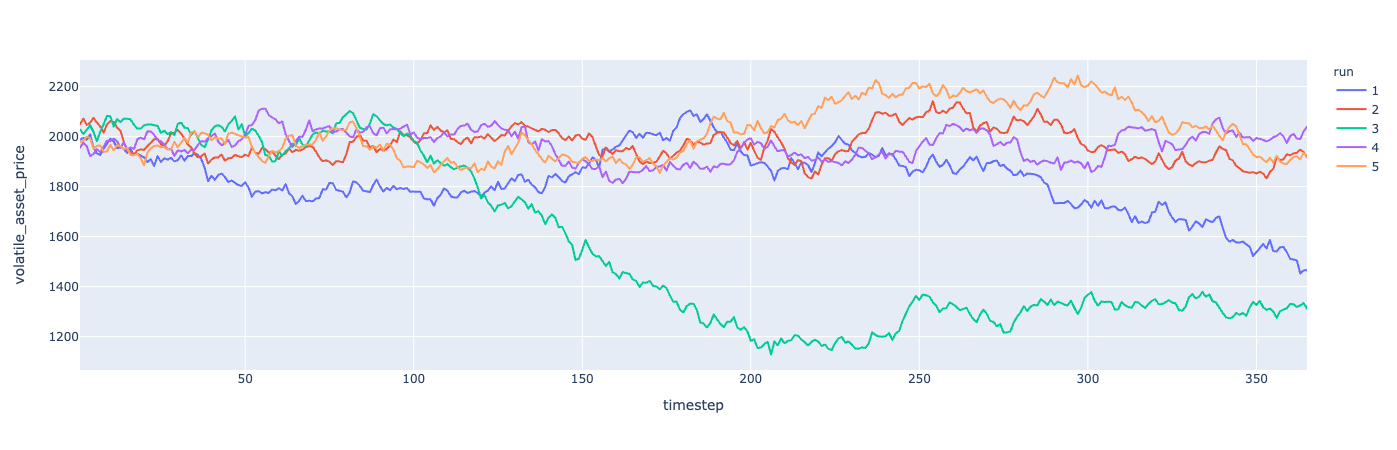

time: 146 ms (started: 2022-06-12 21:28:35 -04:00)


In [23]:
df.query("subset == 0").plot(x='timestep', y='volatile_asset_price', color='run')

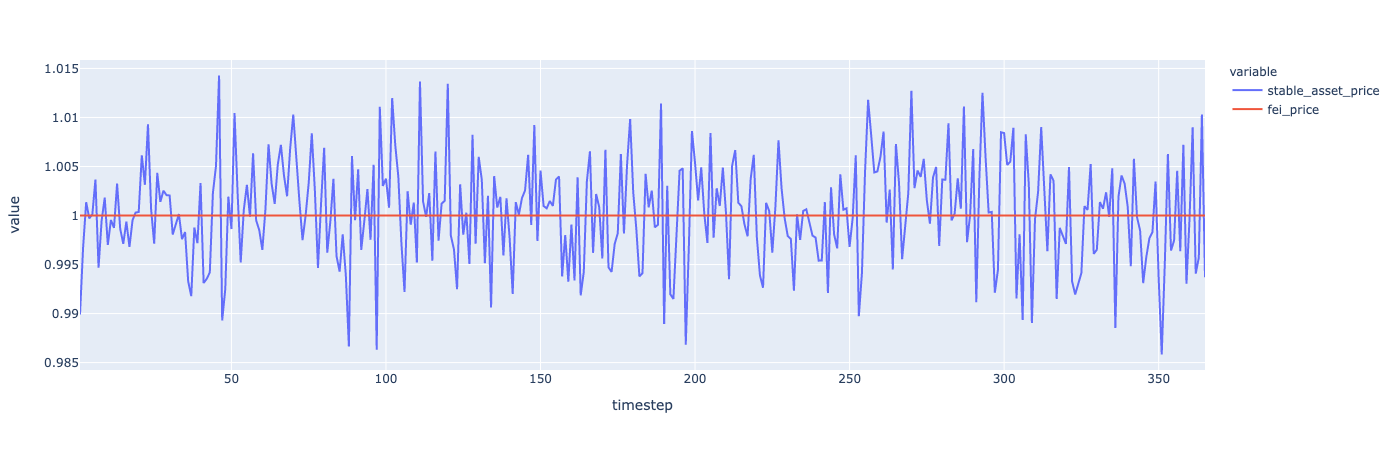

time: 118 ms (started: 2022-06-12 21:29:09 -04:00)


In [26]:
df.query("run == 1 and subset == 0").plot(x='timestep', y=['stable_asset_price', 'fei_price'])

## Protocol Controlled Value

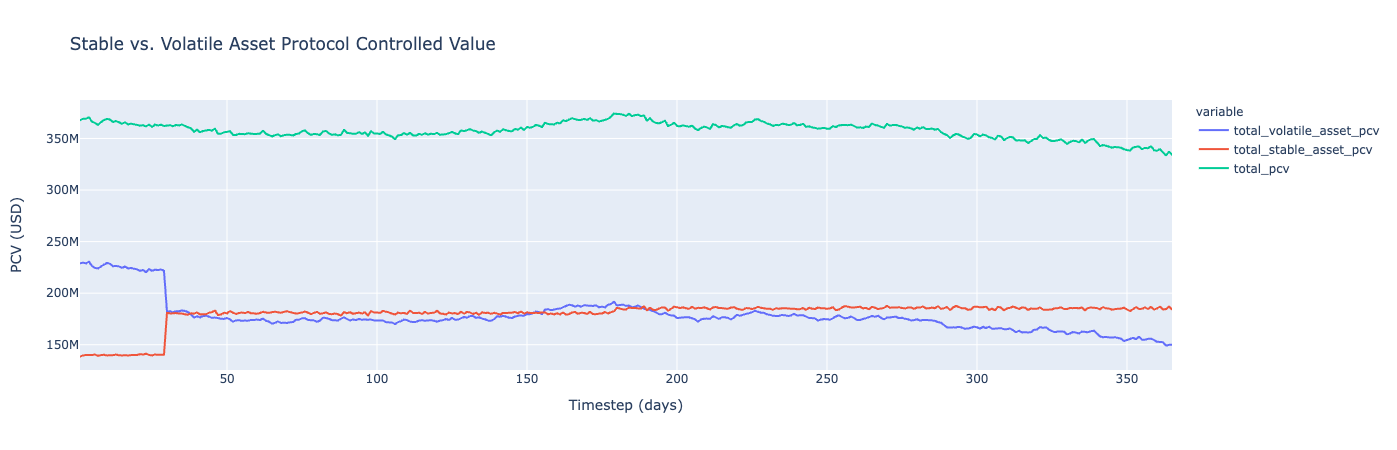

time: 226 ms (started: 2022-06-12 21:29:20 -04:00)


In [27]:
fig = df.query("run == 1 and subset == 0").plot(
    x='timestep',
    y=['total_volatile_asset_pcv', 'total_stable_asset_pcv', 'total_pcv'],
    title='Stable vs. Volatile Asset Protocol Controlled Value',
)

fig.update_xaxes(title='Timestep (days)')
fig.update_yaxes(title='PCV (USD)')

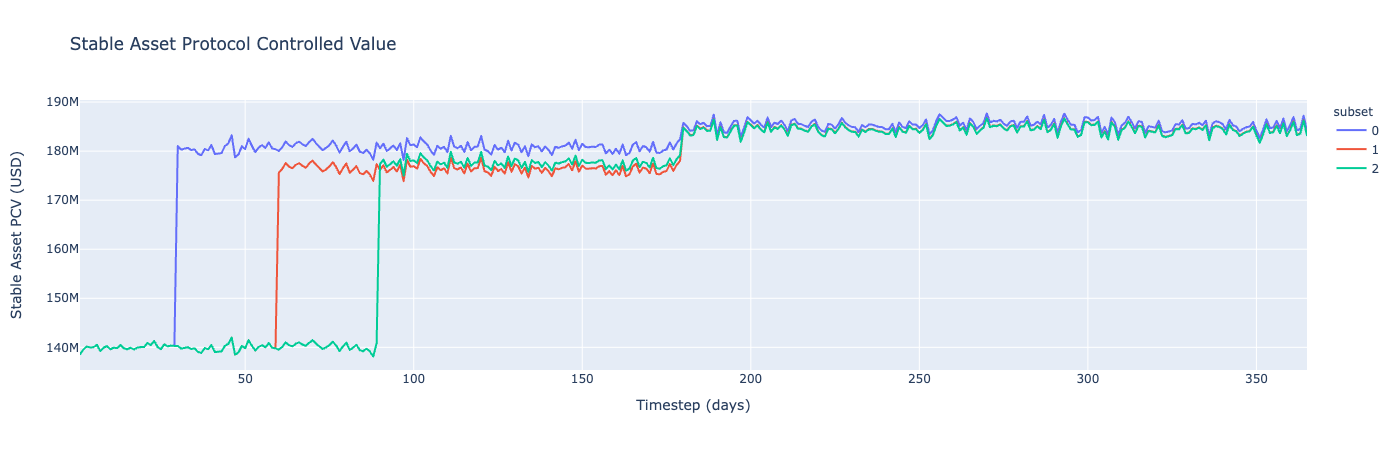

time: 128 ms (started: 2022-06-12 21:29:44 -04:00)


In [28]:
fig = df.query('run == 1').plot(
    x='timestep',
    y='total_stable_asset_pcv',
    title='Stable Asset Protocol Controlled Value',
    color='subset'
)

fig.update_xaxes(title='Timestep (days)')
fig.update_yaxes(title='Stable Asset PCV (USD)')

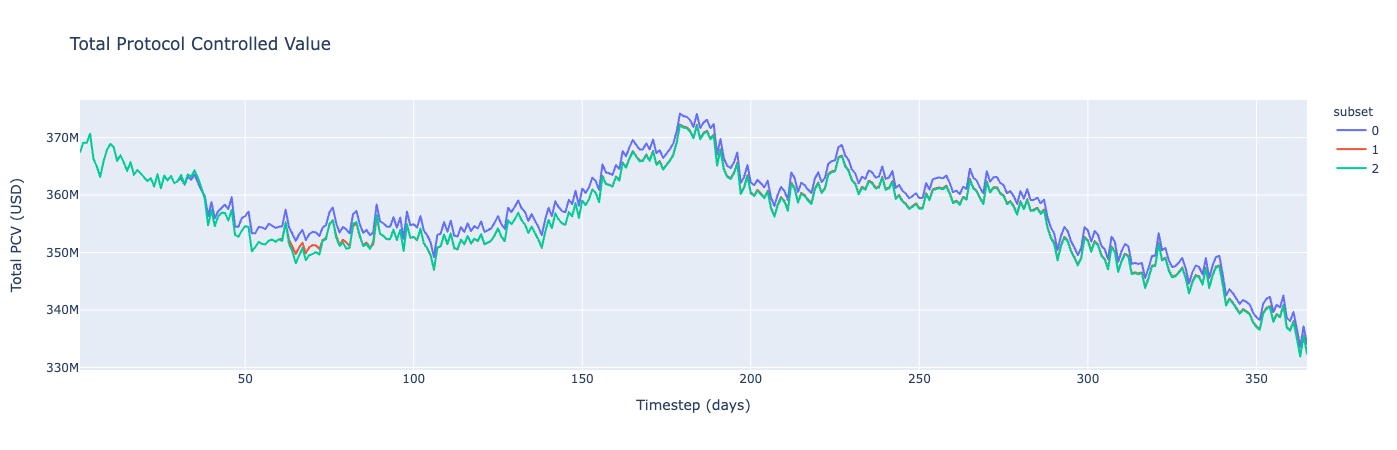

time: 128 ms (started: 2022-06-12 21:29:56 -04:00)


In [29]:
fig = df.query('run == 1').plot(
    x='timestep',
    y='total_pcv',
    title='Total Protocol Controlled Value',
    color='subset',
)

fig.update_xaxes(title='Timestep (days)')
fig.update_yaxes(title='Total PCV (USD)')

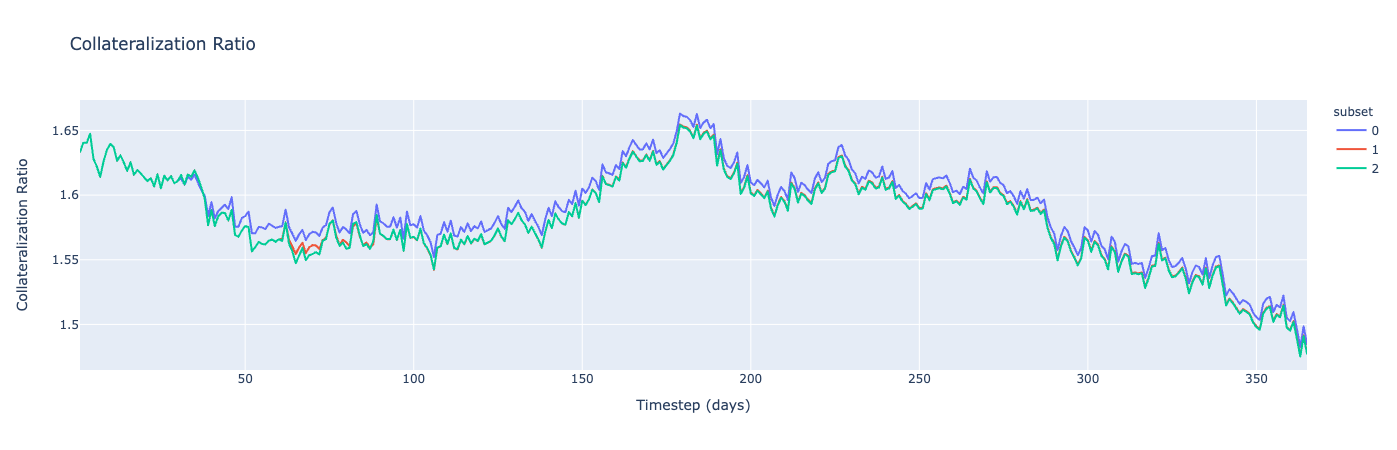

time: 136 ms (started: 2022-06-12 21:30:21 -04:00)


In [30]:
fig = df.query('run == 1').plot(
    x='timestep',
    y=['collateralization_ratio'],
    title='Collateralization Ratio',
    color='subset'
)

fig.update_xaxes(title='Timestep (days)')
fig.update_yaxes(title='Collateralization Ratio')

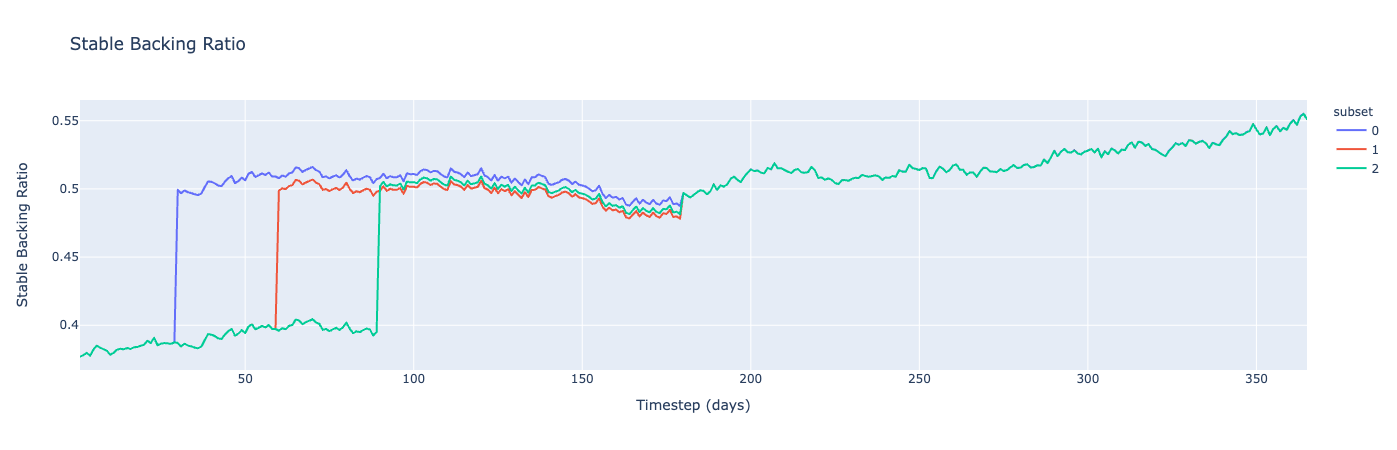

time: 149 ms (started: 2022-06-12 21:30:30 -04:00)


In [31]:
fig = df.query('run == 1').plot(
    x='timestep',
    y=['stable_backing_ratio'],
    title='Stable Backing Ratio',
    color='subset'
)

fig.update_xaxes(title='Timestep (days)')
fig.update_yaxes(title='Stable Backing Ratio')

## Liquidity Pool Source / Sink

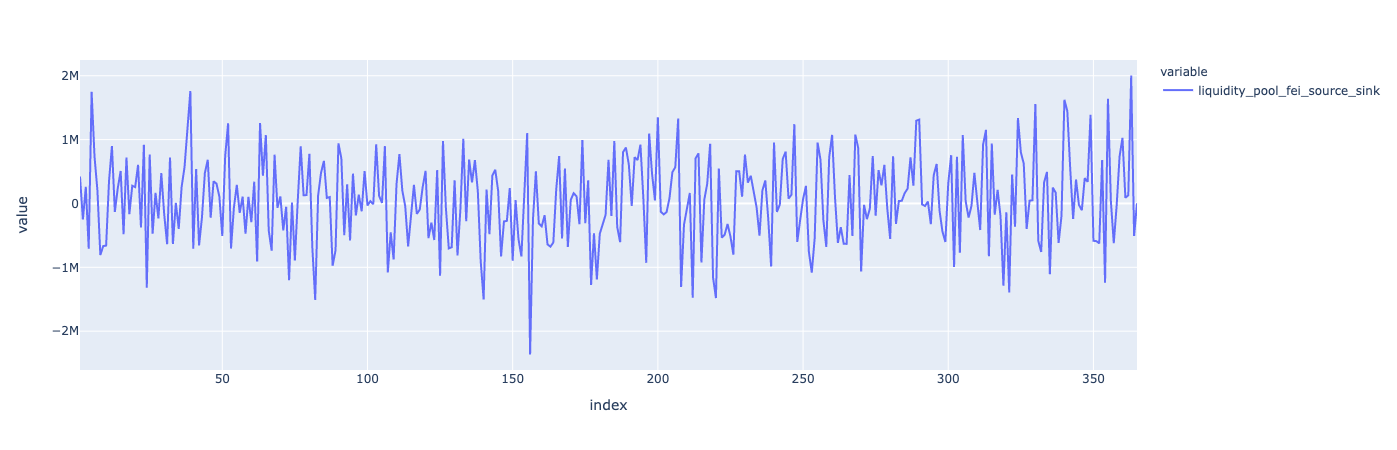

time: 111 ms (started: 2022-06-12 21:30:40 -04:00)


In [32]:
df.query("run == 1 and subset == 0")['liquidity_pool_fei_source_sink'].plot()